In [1]:
import keras
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np.load = np_load_old

In [16]:
print(len(train_data))
max([max(seq) for seq in train_data])

25000


9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [5]:
decoded_review_0 = ' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]])
print(decoded_review_0)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
def vectorize_seqs(seqs, dimension=10000):
    results = np.zeros((len(seqs),dimension))
    for i,seq in enumerate(seqs):
        results[i,seq] = 1
    return results

In [7]:
x_train = vectorize_seqs(train_data)
x_test = vectorize_seqs(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

In [71]:
network = models.Sequential()
network.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
x_val = x_train[:10000]
part_x_train = x_train[10000:]

In [15]:
y_val = y_train[:10000]
part_y_train = y_train[10000:]

In [72]:
history = network.fit(part_x_train, part_y_train, epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.9311 - acc: 0.6667 - val_loss: 0.4307 - val_acc: 0.8139
Epoch 2/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.3486 - acc: 0.8445 - val_loss: 0.4165 - val_acc: 0.7929
Epoch 3/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.2602 - acc: 0.8161 - val_loss: 0.4073 - val_acc: 0.7540
Epoch 4/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.2112 - acc: 0.7621 - val_loss: 0.3679 - val_acc: 0.7314
Epoch 5/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1713 - acc: 0.7339 - val_loss: 0.4313 - val_acc: 0.6765
Epoch 6/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1492 - acc: 0.7060 - val_loss: 0.5772 - val_acc: 0.6211
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1226 - acc: 0.6852 - val_loss: 0.4466 - val_ac

In [73]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [74]:
from matplotlib import pyplot as plt

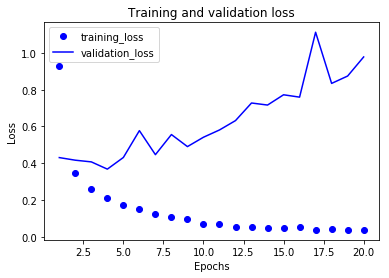

In [75]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,20+1)
plt.plot(epochs,loss_values, "bo", label = "training_loss")
plt.plot(epochs,val_loss_values, "b", label = "validation_loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

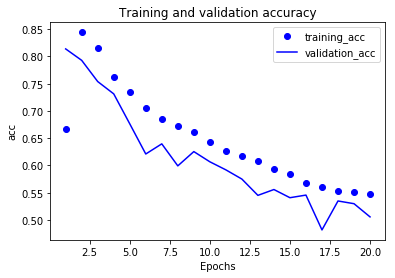

In [76]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values, "bo", label = "training_acc")
plt.plot(epochs,val_acc_values, "b", label = "validation_acc")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [69]:
network.fit(x_train, y_train, epochs = 2, batch_size = 512)

Epoch 1/2
25000/25000 [==============================] - 1s 54us/step - loss: 0.0450 - acc: 0.9470
Epoch 2/2
25000/25000 [==============================] - 1s 51us/step - loss: 0.0333 - acc: 0.9620


In [54]:
results = network.evaluate(x_test,y_test)

25000/25000 [==============================] - 1s 59us/step


In [55]:
results

[0.41621094836711886, 0.86068]

In [30]:
y_test_pred = network.predict(x_test)

In [37]:
decoded_review_1 = ' '.join([reverse_word_index.get(i-3,"?") for i in test_data[0]])
print(decoded_review_1)
print(y_test_pred[0])

? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
[0.01991177]
